<a href="https://colab.research.google.com/github/Anant-0705/Group10_Heart-Disease-Prediction/blob/main/Group10_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc


In [2]:
df = pd.read_csv("/content/heart_disease_uci.csv")
df.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    int64  
 4   cp        920 non-null    int64  
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       920 non-null    int64  
 8   restecg   920 non-null    int64  
 9   thalch    865 non-null    float64
 10  exang     920 non-null    int64  
 11  oldpeak   858 non-null    float64
 12  slope     920 non-null    int64  
 13  ca        309 non-null    float64
 14  thal      920 non-null    int64  
 15  num       920 non-null    int64  
 16  target    920 non-null    int64  
dtypes: float64(5), int64(12)
memory usage: 122.3 KB
None
               id         age         sex     dataset          cp    trestbps  \
count  920.0000

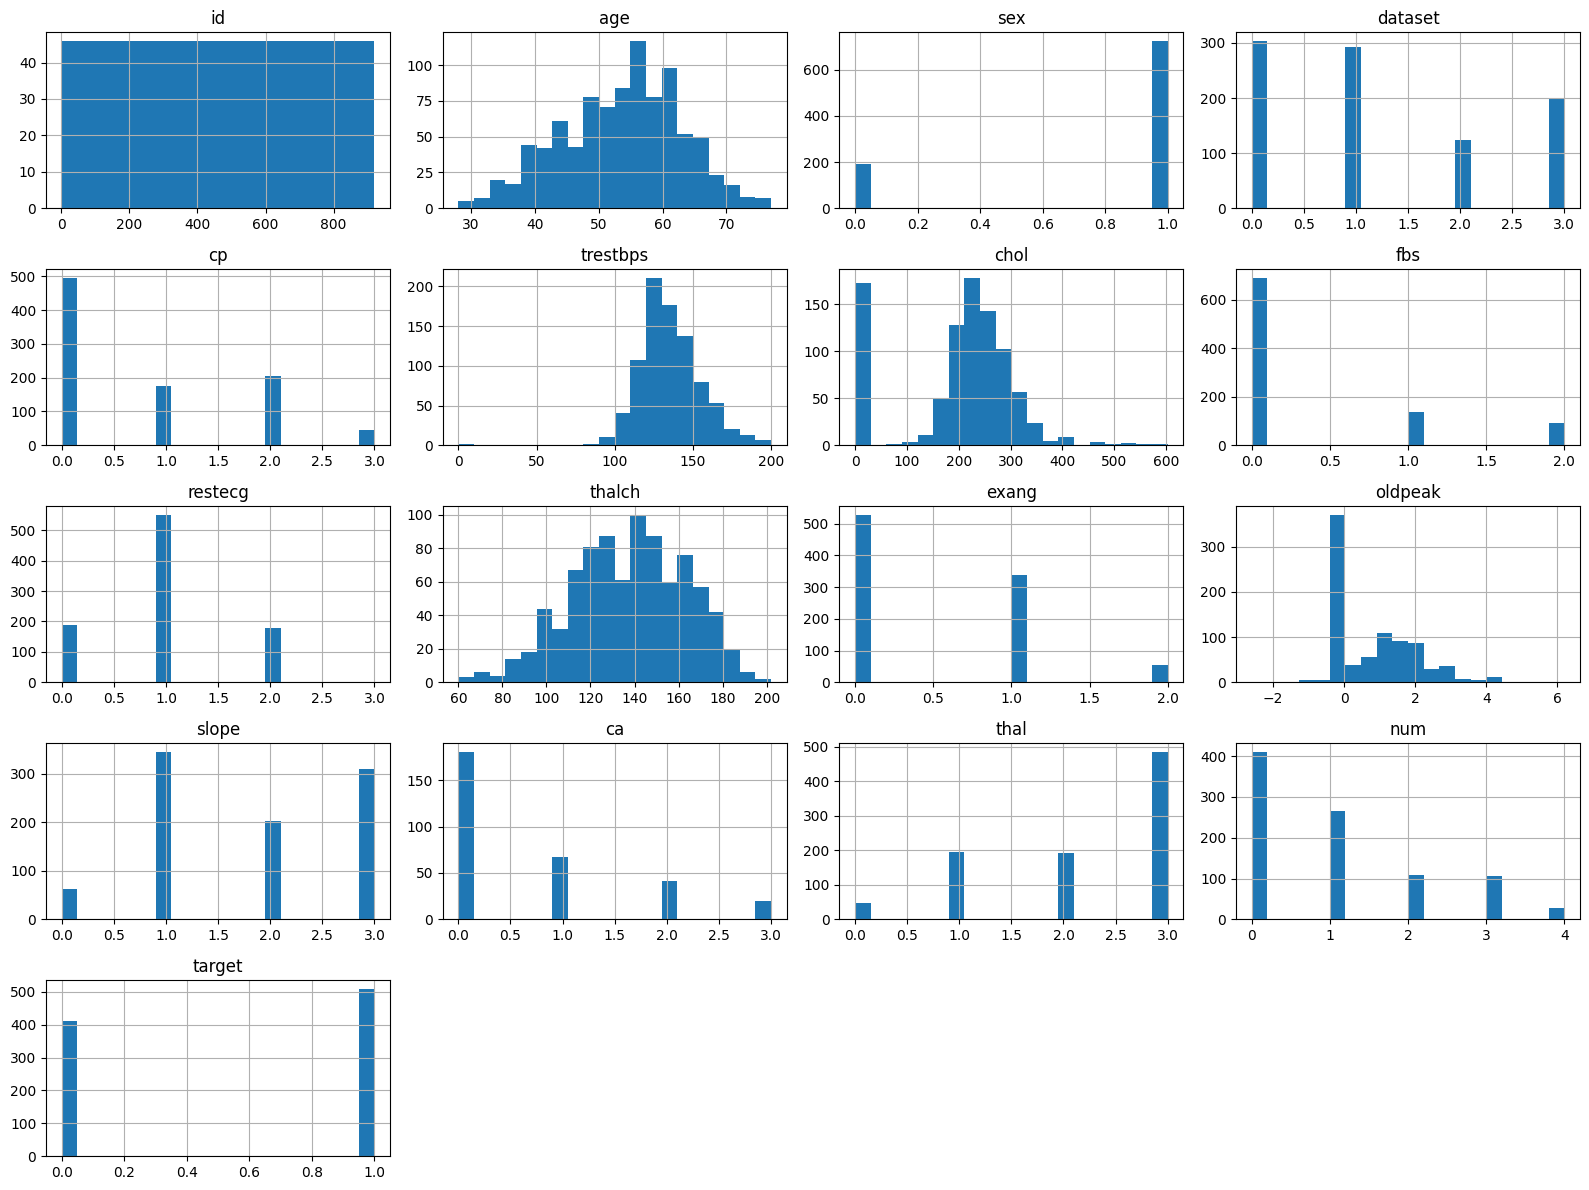

In [21]:
# Basic info
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Value counts for target
print(df['num'].value_counts())

# Encode categorical variables BEFORE calculating correlation
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])



# Distribution plots
df.hist(figsize=(16,12), bins=20)
plt.tight_layout()
plt.show()


# Feature scaling (This part remains after encoding)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('num', axis=1)) # Assuming 'num' is your target
X = pd.DataFrame(scaled_features, columns=df.drop('num', axis=1).columns) # Correct columns for scaled features

# Target variable
y = df['num'] # Assuming 'num' is your target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Encode categorical variables
le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Feature scaling
scaler = StandardScaler()
# Correct the column name to 'num'
scaled_features = scaler.fit_transform(df.drop('num', axis=1))
# Correct the column names for the resulting DataFrame X
X = pd.DataFrame(scaled_features, columns=df.drop('num', axis=1).columns)

# Target variable
# Correct the target column name to 'num'
y = df['num']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.5271739130434783
              precision    recall  f1-score   support

         0.0       0.66      0.91      0.76        75
         1.0       0.45      0.46      0.45        54
         2.0       0.14      0.04      0.06        25
         3.0       0.17      0.12      0.14        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.28      0.31      0.28       184
weighted avg       0.44      0.53      0.47       184



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6032608695652174
              precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        75
         1.0       0.62      0.59      0.60        54
         2.0       0.28      0.20      0.23        25
         3.0       0.28      0.19      0.23        26
         4.0       0.00      0.00      0.00         4

    accuracy                           0.60       184
   macro avg       0.38      0.38      0.37       184
weighted avg       0.55      0.60      0.57       184



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


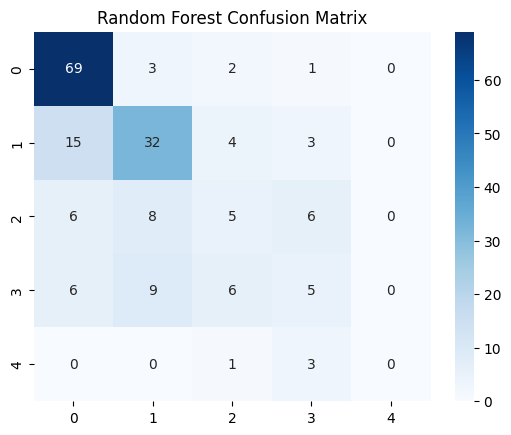

In [12]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.show()


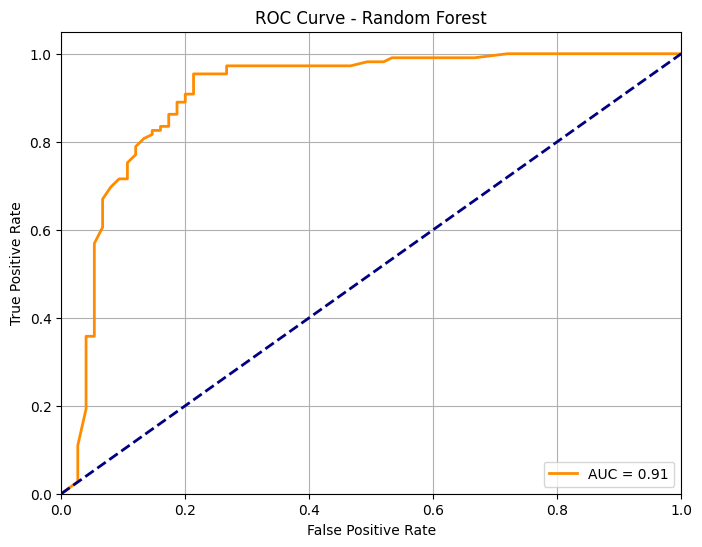

Unique values in y_test: [0 1]


In [20]:


# Create binary target variable: 0 = no disease, 1 = disease present
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Drop unnecessary columns
X = df.drop(['num', 'target', 'id'], axis=1)  # drop 'id' if it exists, else remove it from this line
y = df['target']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_prob_rf = rf.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Check unique values in y_test to confirm it's binary
print("Unique values in y_test:", y_test.unique())
